## Semester 1 Project Submission

Please fill out:
* Student name: 
* Instructor name: 


In [4]:
# Your code here - remember to use markdown cells for comments as well!

In [151]:
import pandas as pd
import sqlite3
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
# You'll need to unzip the db locally.
conn = sqlite3.connect('zippedData/im.db')

# Habib Khadri

# Nick Kirbabas

# Seerat Mutneja

# Sidhya Raman

# Douglas Riggs

In [3]:
pd.read_sql('''
SELECT 
    name
FROM 
    sqlite_schema
WHERE 
    type ='table' AND 
    name NOT LIKE 'sqlite_%';
''',conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


# Andrew Yang

In [172]:
tmdb_df = pd.read_csv("zippedData/tmdb.movies.csv.gz", index_col = 0)
tmdb_df.head(5)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [173]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [170]:
#tn_df = pd.read_csv("zippedData/tn.movie_budgets.csv.gz").drop("id", axis = 1)
#tn_df.head(5)

In [171]:
#tn_df.info()

In [169]:
bom_df = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
bom_df.head(5)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [168]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [164]:
#rt_movie_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz',sep='\t')
#rt_movie_df.head(5)

In [165]:
#rt_movie_df.info()

In [166]:
#rt_reviews_df = pd.read_csv('zippedData/rt.reviews.tsv.gz',sep='\t', encoding="ISO-8859-1")
#rt_reviews_df.head(5)

In [167]:
#rt_reviews_df.info()

In [234]:
imdb_df = pd.read_sql('''
SELECT *
FROM movie_basics
    INNER JOIN movie_ratings USING("movie_id")
''',conn)

In [247]:
imdb_df.dropna(subset = ["genres"], inplace = True)
imdb_df["runtime_minutes"] = imdb_df["runtime_minutes"].fillna(imdb_df["runtime_minutes"].mean())
imdb_df["genres_list"] = [gs.split(",") for gs in imdb_df["genres"]]
imdb_df_c = imdb_df[imdb_df["runtime_minutes"] <= 180]
imdb_df_c.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genres_list
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama",7.0,77,"[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama",7.2,43,"[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama,6.9,4517,[Drama]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,94.732273,"Comedy,Drama",6.1,13,"[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy",6.5,119,"[Comedy, Drama, Fantasy]"


### EDA

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

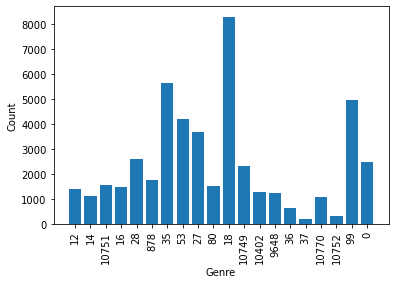

In [102]:
# plots the number of movies that have various categories
genre_Dict = {}
for genres in tmdb_df["genre_ids"]:
    for g in genres.replace("[","").replace("]","").split(", "):
        if g not in genre_Dict:
            genre_Dict[g] = 1
        else:
            genre_Dict[g] += 1


genre_Dict["0"] = genre_Dict.pop("")
fig, ax = plt.subplots()
ax.bar(genre_Dict.keys(),genre_Dict.values())
ax.set_xlabel("Genre")
ax.set_ylabel("Count")
plt.xticks(rotation = 90) 

<BarContainer object of 5 artists>

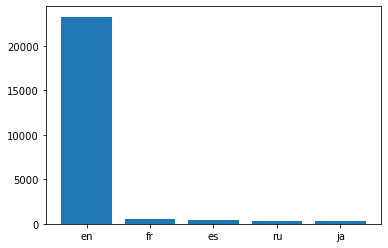

In [103]:
# Shows top 5 languages in movies
org_langs_tmdb = tmdb_df["original_language"].value_counts()[:5]
fig, ax = plt.subplots()
ax.bar(org_langs_tmdb.index,org_langs_tmdb)

<ipython-input-158-7fadf8dc9fdd>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


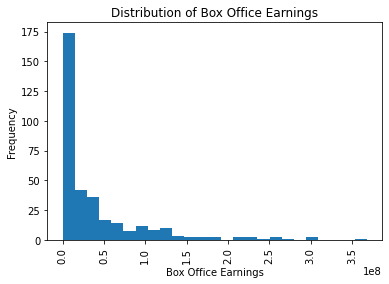

In [158]:
boxoffice_dist = [int(b.replace(",","")) for b in rt_movie_df["box_office"] if isinstance(b, str)]
fig, ax = plt.subplots()
ax.hist(boxoffice_dist, bins = 25)
ax.set_title("Distribution of Box Office Earnings")
ax.set_xlabel("Box Office Earnings")
ax.set_ylabel("Frequency")
plt.xticks(rotation = 90) 
fig.show()

<ipython-input-250-a8ec1373fbc0>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


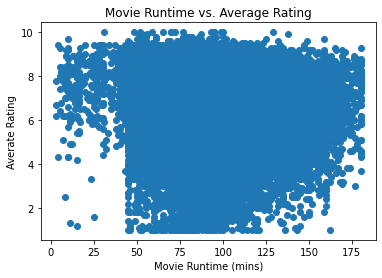

In [250]:
fig, ax = plt.subplots()
ax.scatter(imdb_df_c["runtime_minutes"], imdb_df_c["averagerating"])
ax.set_title("Movie Runtime vs. Average Rating")
ax.set_xlabel("Movie Runtime (mins)")
ax.set_ylabel("Averate Rating")
fig.show()

<AxesSubplot:>

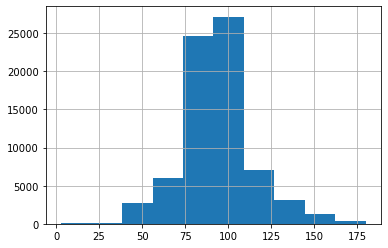

In [249]:
imdb_df_c["runtime_minutes"].hist()